In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.eager as tfe

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
tf.enable_eager_execution()
tf.set_random_seed(777)

In [3]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]

y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

Text(0, 0.5, 'x2')

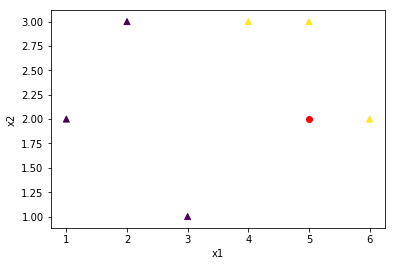

In [4]:
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(
len(x_train))

In [6]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [8]:
def logistic_regression(features):
    hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (
    1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features, labels)
        return tape.gradient(loss_value, [W,b])

In [10]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in tfe.Iterator(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(
                logistic_regression(features),features,labels)))

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6821
Iter: 100, Loss: 0.5770
Iter: 200, Loss: 0.5345
Iter: 300, Loss: 0.5052
Iter: 400, Loss: 0.4836
Iter: 500, Loss: 0.4670
Iter: 600, Loss: 0.4534
Iter: 700, Loss: 0.4419
Iter: 800, Loss: 0.4318
Iter: 900, Loss: 0.4227
Iter: 1000, Loss: 0.4143
Testset Accuracy: 1.0000
